In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d daveianhickey/2000-16-traffic-flow-england-scotland-wales

!unzip 2000-16-traffic-flow-england-scotland-wales.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales
License(s): DbCL-1.0
 64% 85.0M/132M [00:00<00:00, 886MB/s]
100% 132M/132M [00:00<00:00, 799MB/s] 
Archive:  2000-16-traffic-flow-england-scotland-wales.zip
  inflating: Areas.shp               
  inflating: Local_Authority_Districts_Dec_2016.geojson  
  inflating: accident_coords_update.ipynb  
  inflating: accidents_2005_to_2007.csv  
  inflating: accidents_2009_to_2011.csv  
  inflating: accidents_2012_to_2014.csv  
  inflating: ukTrafficAADF.csv       


In [2]:
import pandas as pd

In [3]:
df_0507 = pd.read_csv('/content/accidents_2005_to_2007.csv')
df_0911 = pd.read_csv('/content/accidents_2009_to_2011.csv')
df_1214 = pd.read_csv('/content/accidents_2012_to_2014.csv')


accidents = pd.concat([df_0507, df_0911, df_1214], ignore_index=True)
accidents.shape

/tmp/ipython-input-3-68045699.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_0507 = pd.read_csv('/content/accidents_2005_to_2007.csv')
/tmp/ipython-input-3-68045699.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1214 = pd.read_csv('/content/accidents_2012_to_2014.csv')


(1504150, 33)

In [4]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [6]:
# Veri tipi ve eksik değer kontrolü
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [7]:
accidents.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,101
Location_Northing_OSGR,101
Longitude,101
Latitude,101
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


In [8]:
accidents.dropna(subset=['Longitude', 'Latitude', 'Time','Weather_Conditions'], inplace=True)

In [10]:
fill_unknown_cols = [
    'Junction_Detail', 'Junction_Control',
    'Special_Conditions_at_Site', 'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident'
]
accidents[fill_unknown_cols] = accidents[fill_unknown_cols].fillna('Unknown')

accidents.fillna({
    'Pedestrian_Crossing-Human_Control': 'None',
    'Pedestrian_Crossing-Physical_Facilities': 'None',
    'Road_Surface_Conditions': 'Dry'
}, inplace=True)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

accidents['Date'] = pd.to_datetime(accidents['Date'], errors='coerce')
accidents['Year'] = accidents['Date'].dt.year
accidents['Month'] = accidents['Date'].dt.month


/tmp/ipython-input-12-1663899160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accidents, x='Year', palette='coolwarm')


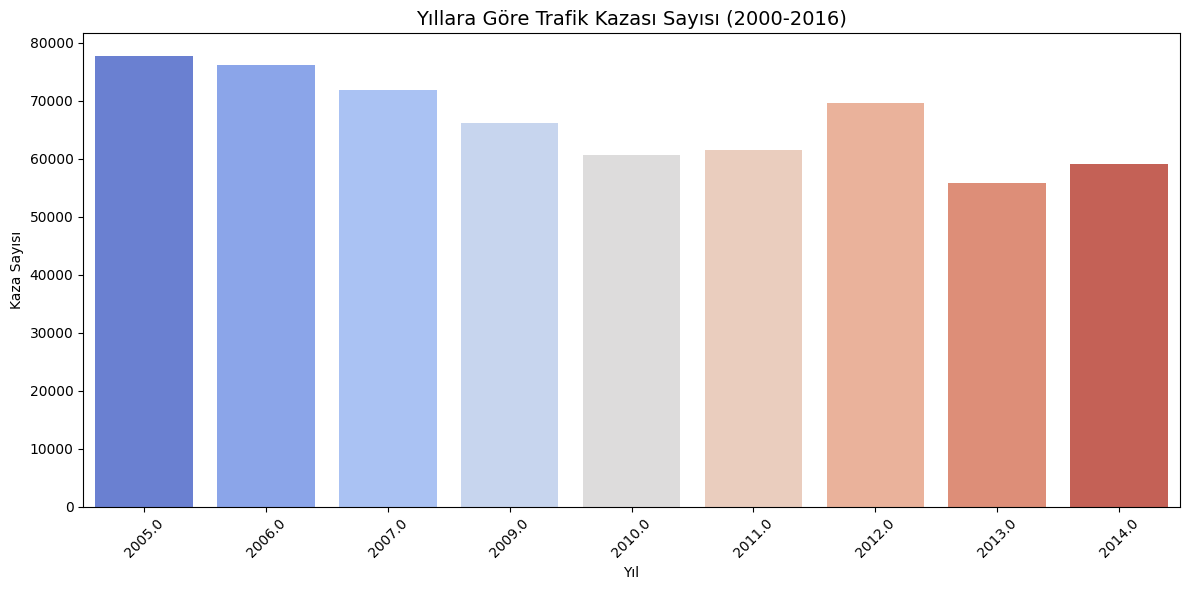

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accidents, x='Year', palette='coolwarm')
plt.title("Yıllara Göre Trafik Kazası Sayısı (2000-2016)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-857827339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accidents, x='Accident_Severity', palette='Set2')


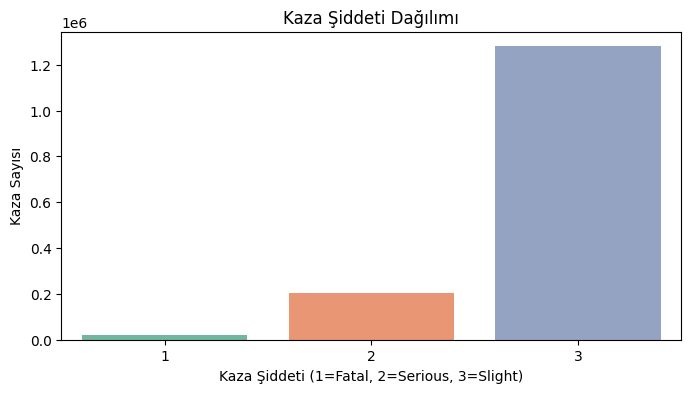

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(data=accidents, x='Accident_Severity', palette='Set2')
plt.title("Kaza Şiddeti Dağılımı")
plt.xlabel("Kaza Şiddeti (1=Fatal, 2=Serious, 3=Slight)")
plt.ylabel("Kaza Sayısı")
plt.show()

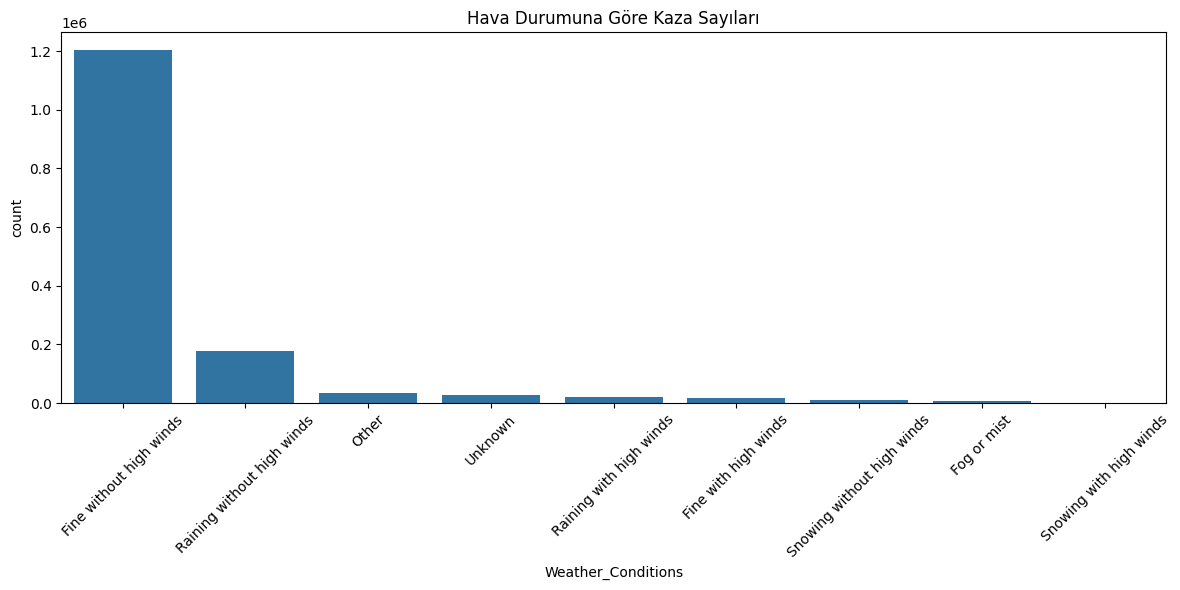

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accidents, x='Weather_Conditions', order=accidents['Weather_Conditions'].value_counts().index)
plt.title("Hava Durumuna Göre Kaza Sayıları")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-2051025756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accidents, x='Urban_or_Rural_Area', palette='pastel')


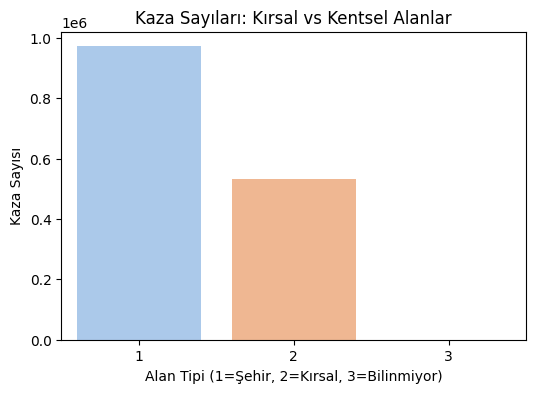

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=accidents, x='Urban_or_Rural_Area', palette='pastel')
plt.title("Kaza Sayıları: Kırsal vs Kentsel Alanlar")
plt.xlabel("Alan Tipi (1=Şehir, 2=Kırsal, 3=Bilinmiyor)")
plt.ylabel("Kaza Sayısı")
plt.show()

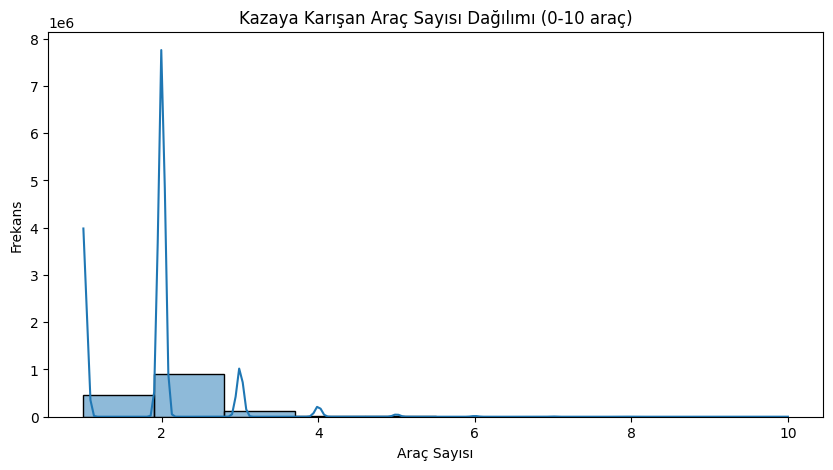

In [18]:
filtered = accidents[accidents['Number_of_Vehicles'] <= 10]

plt.figure(figsize=(10, 5))
sns.histplot(filtered['Number_of_Vehicles'], bins=10, kde=True)
plt.title("Kazaya Karışan Araç Sayısı Dağılımı (0-10 araç)")
plt.xlabel("Araç Sayısı")
plt.ylabel("Frekans")
plt.show()


In [19]:
print("Ortalama araç sayısı:", accidents['Number_of_Vehicles'].mean())
print("Medyan araç sayısı:", accidents['Number_of_Vehicles'].median())
print("Maksimum araç sayısı:", accidents['Number_of_Vehicles'].max())

Ortalama araç sayısı: 1.831615248243457
Medyan araç sayısı: 2.0
Maksimum araç sayısı: 67


Text(0.5, 1.0, 'Kazalardaki Yaralı Sayısı Dağılımı (0-10 kişi)')

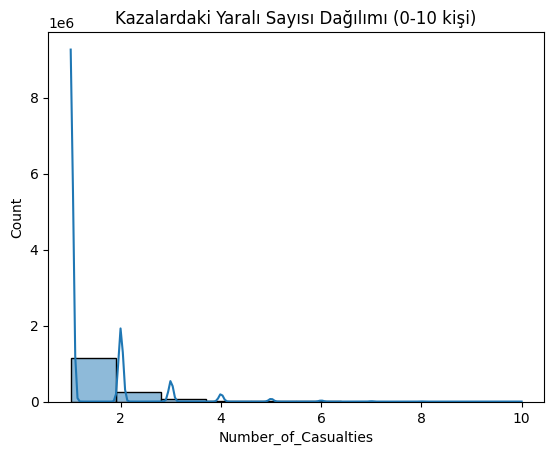

In [20]:
filtered_casualties = accidents[accidents['Number_of_Casualties'] <= 10]
sns.histplot(filtered_casualties['Number_of_Casualties'], bins=10, kde=True)
plt.title("Kazalardaki Yaralı Sayısı Dağılımı (0-10 kişi)")

<Axes: xlabel='Urban_or_Rural_Area', ylabel='count'>

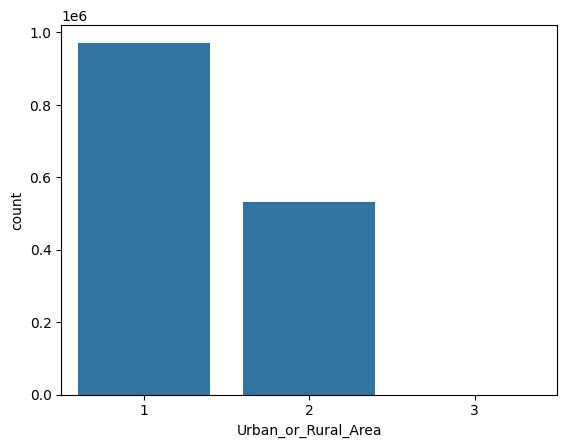

In [21]:
sns.countplot(x='Urban_or_Rural_Area', data=accidents)

<Axes: xlabel='Weather_Conditions', ylabel='count'>

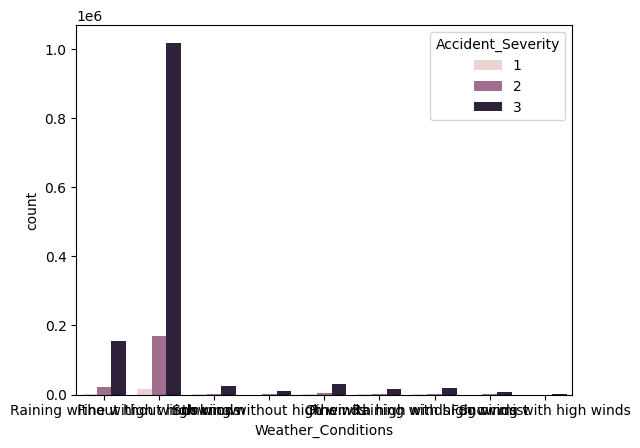

In [22]:
sns.countplot(data=accidents, x='Weather_Conditions', hue='Accident_Severity')

In [23]:
!pip install prophet

In [24]:
# Yıl + Ay bazında kaza sayısı
monthly = accidents.groupby(pd.to_datetime(accidents['Date']).dt.to_period('M')).size().reset_index(name='y')
monthly['ds'] = monthly['Date'].dt.to_timestamp()
monthly = monthly[['ds', 'y']]
monthly.head()

,ds,y
0,2005-01-01,6591
1,2005-02-01,6411
2,2005-03-01,5988
3,2005-04-01,6310
4,2005-05-01,6433


In [25]:
from prophet import Prophet

model = Prophet()
model.fit(monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdjvcrh6/t2vne787.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdjvcrh6/0ku4g407.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7816', 'data', 'file=/tmp/tmpmdjvcrh6/t2vne787.json', 'init=/tmp/tmpmdjvcrh6/0ku4g407.json', 'output', 'file=/tmp/tmpmdjvcrh6/prophet_model41gsrfe6/prophet_model-20250724215138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:51:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future = model.make_future_dataframe(periods=12, freq='M')  # 12 ay ileriye tahmin
forecast = model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


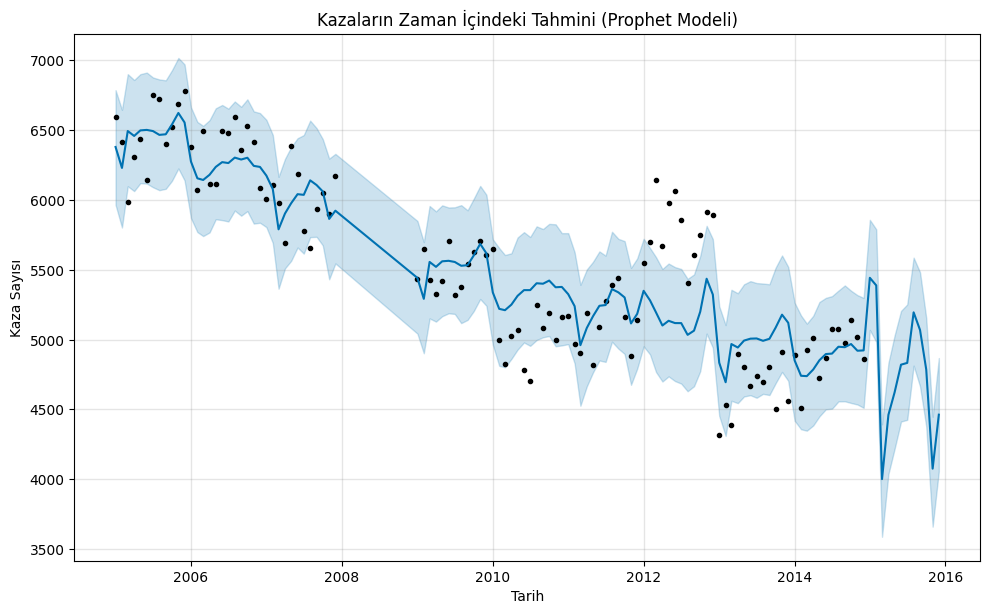

In [28]:
fig = model.plot(forecast)
plt.title("Kazaların Zaman İçindeki Tahmini (Prophet Modeli)")
plt.xlabel("Tarih")
plt.ylabel("Kaza Sayısı")
plt.show()